*GRAFICOS*


https://python-graph-gallery.com/

In [ ]:
pip install seaborn

In [ ]:
pip install joypy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import gaussian_kde

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definir la paleta de colores Blue2Orange8Steps
blue2orange_palette = [
    '#0033A0', '#0044B8', '#0055C6', '#0066D4',
    '#0077E0', '#0088EC', '#0099F8', '#00AAFF'
]

In [ ]:
import pandas as pd

# Ruta al archivo CSV en Google Drive
ruta = '/content/drive/MyDrive/jeje/tabla_extraida.csv'

# Leer el archivo CSV en un DataFrame, ignorando las primeras filas vacías
df = pd.read_csv(ruta, header=None, skip_blank_lines=True)

# Eliminar filas completamente vacías
df.dropna(how='all', inplace=True)

# Verificar el número de columnas en el DataFrame
print("Número de columnas:", len(df.columns))

# Asignar nombres a las columnas
column_names = ['Region', 'Empty'] + [str(year) for year in range(2010, 2023)]

# Si el número de columnas no coincide con el número de nombres, ajusta la lista de nombres
if len(df.columns) == len(column_names):
    df.columns = column_names
else:
    print(f"Advertencia: El número de columnas ({len(df.columns)}) no coincide con el número de nombres proporcionados ({len(column_names)}).")

# Eliminar la columna 'Empty' si no es necesaria
df.drop(columns=['Empty'], inplace=True, errors='ignore')

# Función para traducir nombres de regiones
def translate_region(name):
    if 'Region of' in name:
        return name.replace('Region of', 'Región de')
    return name

# Aplicar la función a la columna 'Region'
df['Region'] = df['Region'].apply(translate_region)

# Ruta para guardar el archivo CSV modificado
ruta_guardar = '/content/drive/MyDrive/jeje/modificada.csv'

# Guardar el DataFrame en un nuevo archivo CSV
df.to_csv(ruta_guardar, index=False)


Número de columnas: 15


In [ ]:
df

,Region,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total Pais,-32.8,-35.0,-33.3,-34.0,-29.7,-31.1,-31.0,-29.7,-27.1,-28.1,-20.4,-21.7,-25.5
1,Región de Arica y Parinacota,-32.6,-37.6,-42.3,-19.7,-26.7,-26.8,-26.7,-33.5,-28.0,-25.5,-11.4,-29.6,-24.5
2,Región de Tarapacá,-39.1,-28.8,-32.8,-31.2,-35.9,-32.0,-31.1,-30.5,-25.4,-20.6,-30.7,-30.8,-34.5
3,Región de Antofagasta,-44.3,-40.5,-41.8,-45.6,-41.8,-42.0,-38.6,-45.6,-40.0,-42.4,-40.7,-31.2,-40.4
4,Región de Atacama,-39.3,-32.9,-37.0,-35.3,-28.0,-37.8,-39.0,-33.7,-37.7,-39.7,-29.3,-26.8,-34.4
5,Región de Coquimbo,-33.6,-34.4,-35.7,-37.9,-33.6,-34.6,-28.4,-34.8,-32.1,-28.2,-10.5,-29.6,-32.6
6,Región de Valparaíso,-37.8,-43.5,-38.4,-33.0,-27.2,-31.7,-33.0,-33.9,-30.1,-33.5,-22.0,-23.7,-22.9
7,Region Metropolitana de Santiago,-34.3,-37.2,-36.0,-38.1,-31.0,-32.6,-33.6,-31.5,-29.3,-29.6,-21.0,-21.4,-25.2
8,Región de Libertador Gral. Bernardo O'Higgins,-34.2,-25.3,-27.1,-31.0,-26.8,-30.6,-29.2,-17.6,-16.1,-19.0,-17.8,-31.0,-26.2
9,Región de Maule,-25.5,-24.0,-24.0,-25.6,-28.6,-26.7,-25.8,-27.0,-20.1,-22.4,-15.6,-14.7,-14.6


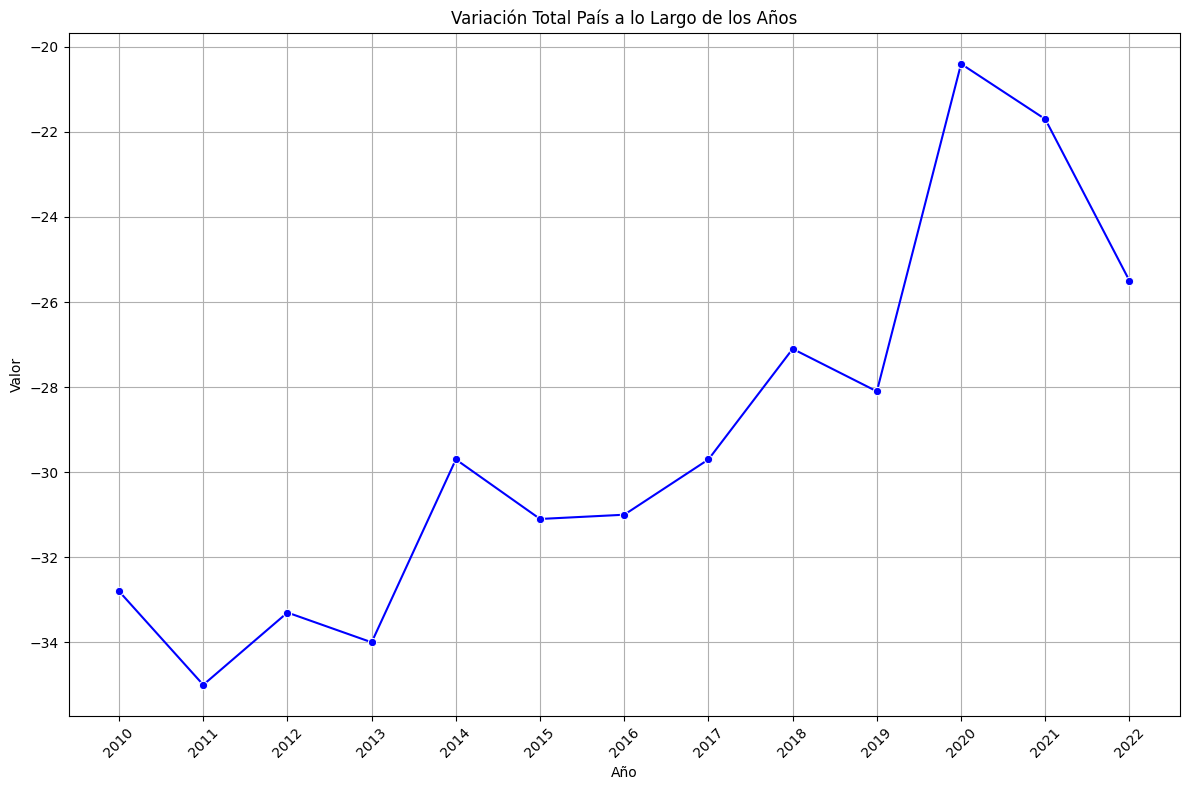

In [ ]:
# Filtrar los datos para 'Total Pais'
df_total_pais = df[df['Region'] == 'Total Pais']

# Transponer el DataFrame para un formato adecuado para seaborn
df_total_pais = df_total_pais.melt(id_vars=['Region'], var_name='Año', value_name='Valor')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(x='Año', y='Valor', data=df_total_pais, marker='o', color='b')

# Personalizar el gráfico
plt.title('Variación Total País a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Analisis

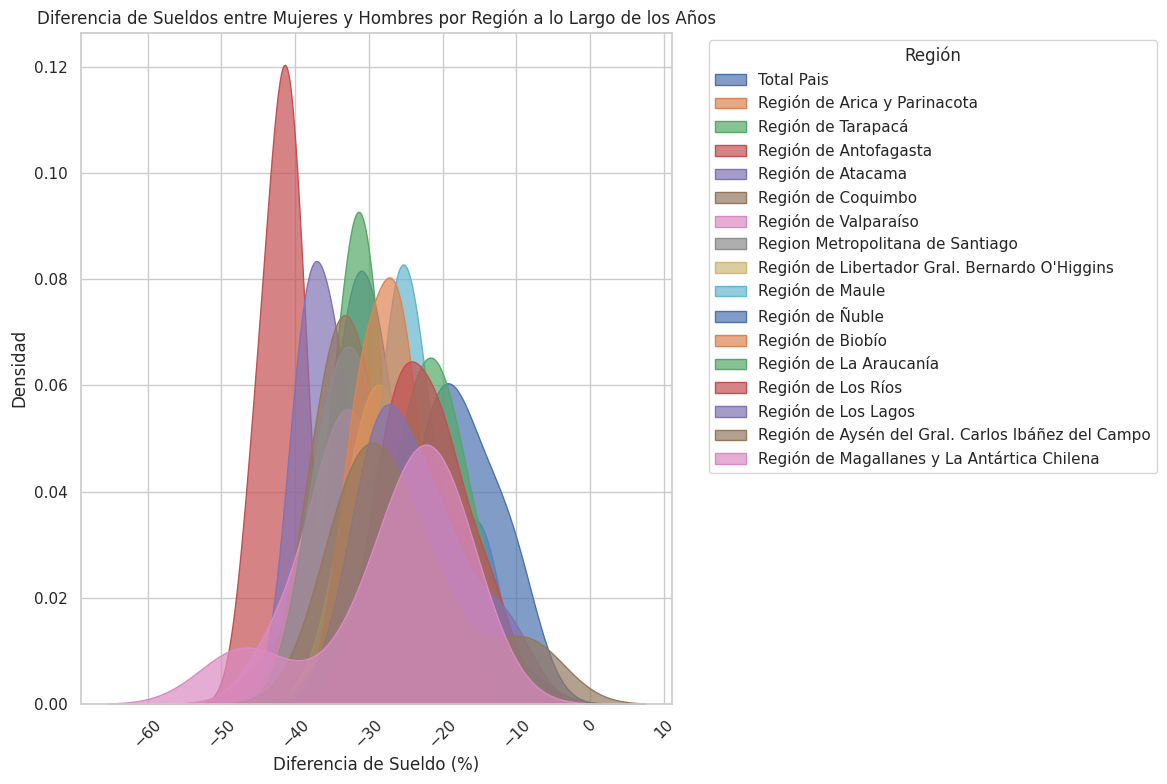

In [ ]:
# Asumiendo que ya tienes el DataFrame 'df' cargado con tus datos

# Reformatear el DataFrame en formato "long"
df_long = df.melt(id_vars=['Region'], var_name='Año', value_name='Diferencia')

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de Ridgeline usando seaborn kdeplot
plt.figure(figsize=(12, 8))

# Iterar sobre cada región y graficar su densidad
for region in df['Region'].unique():
    subset = df_long[df_long['Region'] == region]
    sns.kdeplot(data=subset, x='Diferencia', label=region, fill=True, common_norm=False, alpha=0.7)

# Personalizar el gráfico
plt.title('Diferencia de Sueldos entre Mujeres y Hombres por Región a lo Largo de los Años')
plt.xlabel('Diferencia de Sueldo (%)')
plt.ylabel('Densidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


analisis

In [ ]:
# Filtrar el DataFrame para eliminar la región "Total País"
df_filtered = df[df['Region'] != 'Total País'].set_index('Region')

# Encontrar los valores máximos por región
max_values = df_filtered.max(axis=1)  # Encuentra el valor máximo por región
max_years = df_filtered.idxmax(axis=1)  # Encuentra el año con el valor máximo por región

# Crear un DataFrame con los valores máximos
max_data = pd.DataFrame({
    'Region': max_values.index,
    'Año': max_years.values,
    'Diferencia': max_values.values
})

# Mostrar los datos con los valores máximos
print(max_data)

                                               Region   Año  Diferencia
0                                          Total Pais  2020       -20.4
1                        Región de Arica y Parinacota  2020       -11.4
2                                  Región de Tarapacá  2019       -20.6
3                               Región de Antofagasta  2021       -31.2
4                                   Región de Atacama  2021       -26.8
5                                  Región de Coquimbo  2020       -10.5
6                                Región de Valparaíso  2020       -22.0
7                    Region Metropolitana de Santiago  2020       -21.0
8       Región de Libertador Gral. Bernardo O'Higgins  2018       -16.1
9                                     Región de Maule  2022       -14.6
10                                    Región de Ñuble  2016       -10.0
11                                   Región de Biobío  2020       -17.7
12                             Región de La Araucanía  2019     

<ipython-input-12-a32807563a21>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Region', y='Diferencia', data=max_data, palette=blue2orange_palette)
<ipython-input-12-a32807563a21>:8: UserWarning: 
The palette list has fewer values (8) than needed (17) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Region', y='Diferencia', data=max_data, palette=blue2orange_palette)


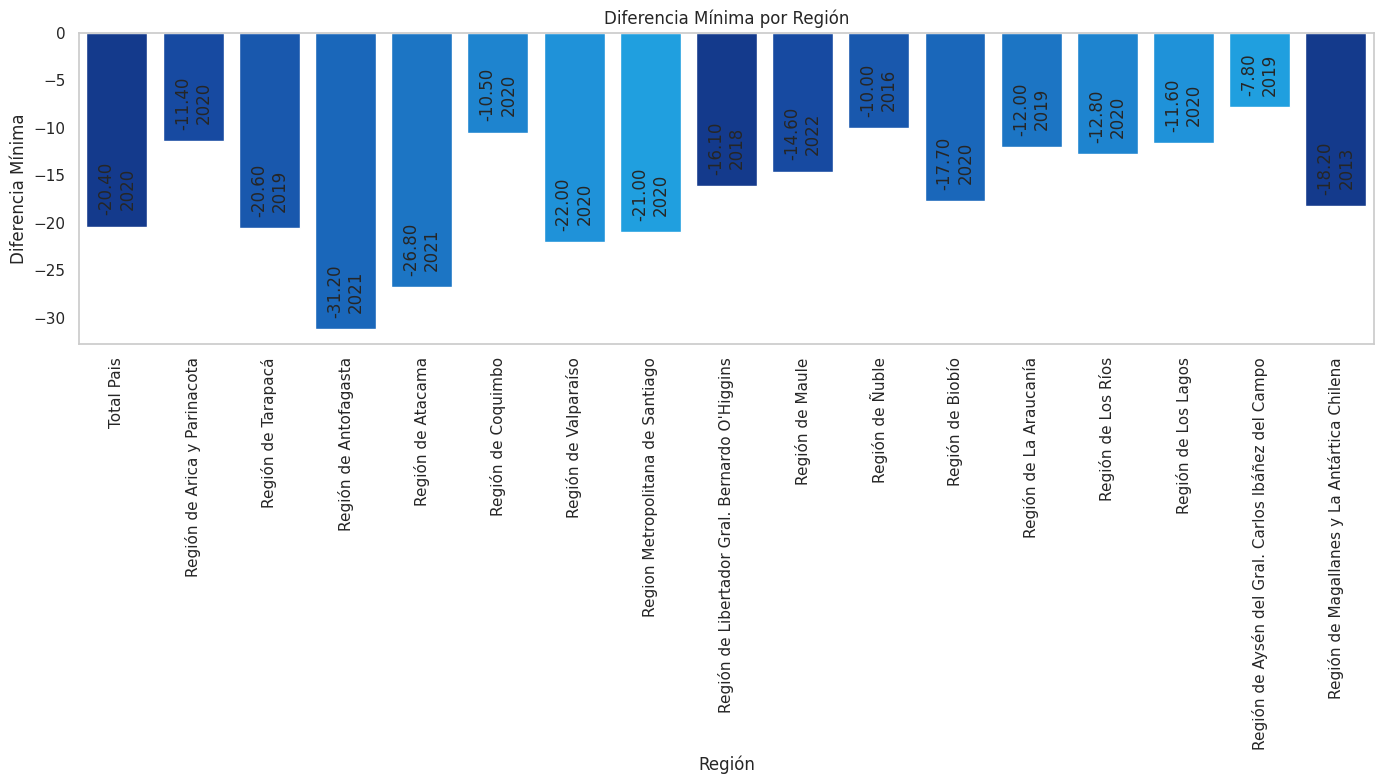

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras usando seaborn con la paleta personalizada
ax = sns.barplot(x='Region', y='Diferencia', data=max_data, palette=blue2orange_palette)

# Agregar los valores exactos y el año correspondiente encima de cada barra en vertical
for index, p in enumerate(ax.patches):
    height = p.get_height()
    # Obtener el año correspondiente de 'max_data'
    year = max_data.iloc[index]['Año']
    # Anotación combinada con la diferencia mínima y el año
    ax.annotate(f'{height:.2f}\n{year}',  # Combina la diferencia con el año en una sola cadena
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 8),  # 8 puntos verticales de desplazamiento
                textcoords='offset points', rotation=90)

# Personalizar el gráfico
plt.title('Diferencia Mínima por Región')
plt.xlabel('Región')
plt.ylabel('Diferencia Mínima')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor visibilidad
plt.grid(axis='y')  # Añade una cuadrícula horizontal
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Filtrar el DataFrame para obtener los valores mínimos por región
df_filtered = df.set_index('Region')
min_values = df_filtered.min(axis=1)  # Encuentra el valor mínimo por región
min_years = df_filtered.idxmin(axis=1)  # Encuentra el año con el valor mínimo por región

# Crear un DataFrame con los valores mínimos
min_data = pd.DataFrame({
    'Region': min_values.index,
    'Año': min_years.values,
    'Diferencia': min_values.values
})

# Mostrar los datos con los valores mínimos
print(min_data)


                                               Region   Año  Diferencia
0                                          Total Pais  2011       -35.0
1                        Región de Arica y Parinacota  2012       -42.3
2                                  Región de Tarapacá  2010       -39.1
3                               Región de Antofagasta  2013       -45.6
4                                   Región de Atacama  2019       -39.7
5                                  Región de Coquimbo  2013       -37.9
6                                Región de Valparaíso  2011       -43.5
7                    Region Metropolitana de Santiago  2013       -38.1
8       Región de Libertador Gral. Bernardo O'Higgins  2010       -34.2
9                                     Región de Maule  2014       -28.6
10                                    Región de Ñuble  2011       -31.3
11                                   Región de Biobío  2011       -33.8
12                             Región de La Araucanía  2011     

<ipython-input-14-1bceb373b107>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Region', y='Diferencia', data=min_data, palette=blue2orange_palette)
<ipython-input-14-1bceb373b107>:8: UserWarning: 
The palette list has fewer values (8) than needed (17) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Region', y='Diferencia', data=min_data, palette=blue2orange_palette)


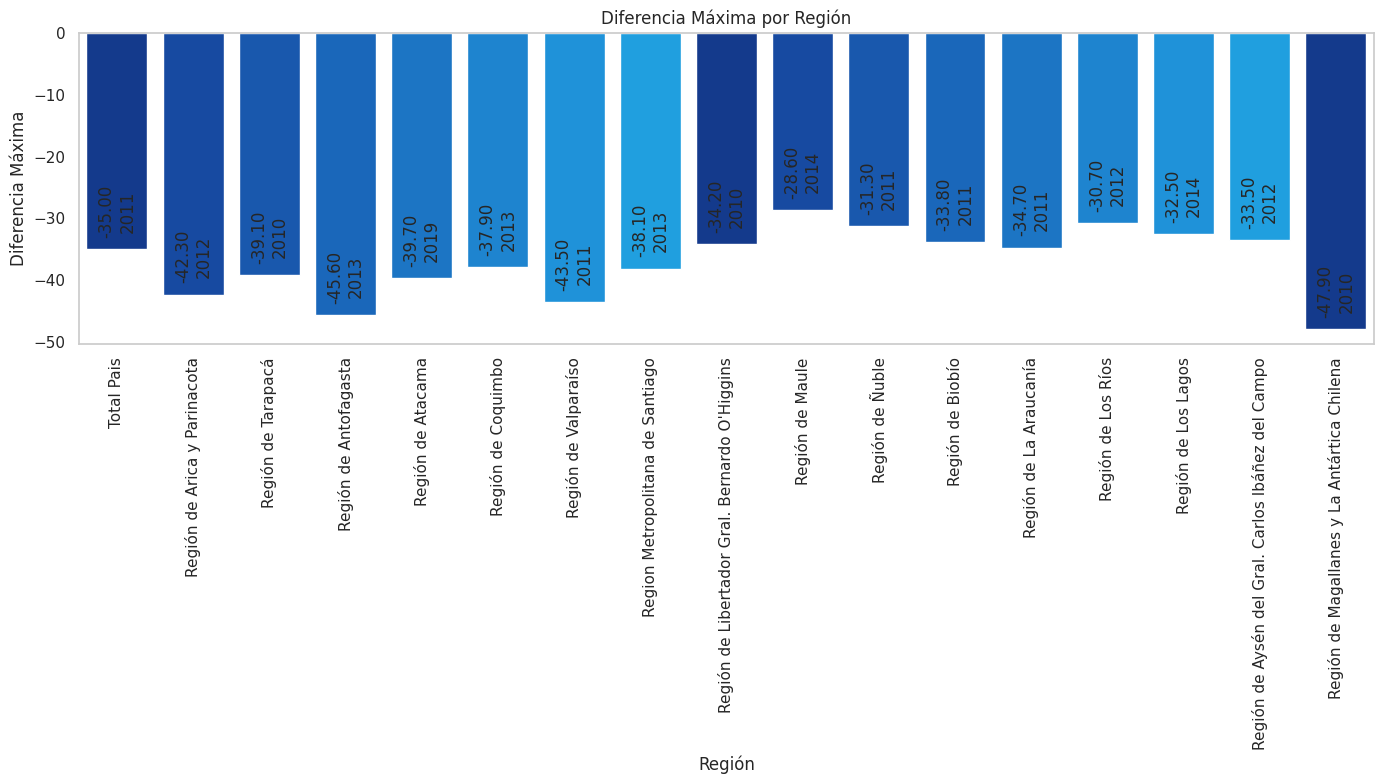

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de barras usando seaborn con la paleta personalizada
ax = sns.barplot(x='Region', y='Diferencia', data=min_data, palette=blue2orange_palette)

# Agregar los valores exactos y el año correspondiente encima de cada barra en vertical
for index, p in enumerate(ax.patches):
    height = p.get_height()
    # Obtener el año correspondiente de 'min_data'
    year = min_data.iloc[index]['Año']
    # Anotación combinada con la diferencia máxima y el año
    ax.annotate(f'{height:.2f}\n{year}',  # Combina la diferencia con el año en una sola cadena
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 8),  # 8 puntos verticales de desplazamiento
                textcoords='offset points', rotation=90)

# Personalizar el gráfico
plt.title('Diferencia Máxima por Región')
plt.xlabel('Región')
plt.ylabel('Diferencia Máxima')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor visibilidad
plt.grid(axis='y')  # Añade una cuadrícula horizontal
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se clasifican las regiones del país por zonas:

*   Norte
*   Sur
*   Centro



In [ ]:
# Aplicar la función a la columna 'Region'
df['Region'] = df['Region'].apply(translate_region)

# Definir las listas de regiones en español
norte_regiones = [
    'Región de Arica y Parinacota', 'Región de Tarapacá', 'Región de Antofagasta',
    'Región de Atacama', 'Región de Coquimbo'
]

# Lista actualizada de regiones del centro
centro_regiones = [
    'Región de Valparaíso', 'Región Metropolitana de Santiago',
    'Región de Libertador Gral. Bernardo O\'Higgins', 'Región del Maule', 'Región de Ñuble'
]


sur_regiones = [
    'Región del Biobío', 'Región de La Araucanía', 'Región de Los Ríos',
    'Región de Los Lagos', 'Región de Aysén del Gral. Carlos Ibáñez del Campo',
    'Región de Magallanes y La Antártica Chilena'
]

# Filtrar el DataFrame por región
df_norte = df[df['Region'].isin(norte_regiones)]
df_centro = df[df['Region'].isin(centro_regiones)]
df_sur = df[df['Region'].isin(sur_regiones)]


In [ ]:
# Función para convertir las columnas numéricas a valores absolutos
def convert_to_positive(df):
    df_copy = df.copy()  # Copia del DataFrame para evitar modificar el original
    num_cols = df_copy.select_dtypes(include=['number']).columns  # Selecciona las columnas numéricas
    df_copy[num_cols] = df_copy[num_cols].abs()  # Aplica .abs() solo a las columnas numéricas
    return df_copy

# Convertir los valores a positivos
df_norte_positive = convert_to_positive(df_norte)
df_sur_positive = convert_to_positive(df_sur)
df_centro_positive = convert_to_positive(df_centro)

# Eliminar la columna 'Promedio'
df_norte_positive = df_norte_positive.drop(columns=['Promedio'], errors='ignore')
df_sur_positive = df_sur_positive.drop(columns=['Promedio'], errors='ignore')
df_centro_positive = df_centro_positive.drop(columns=['Promedio'], errors='ignore')

# Añadir una columna para identificar la región
df_norte_positive['Region'] = 'Norte'
df_sur_positive['Region'] = 'Sur'
df_centro_positive['Region'] = 'Centro'

In [ ]:
df_norte_positive

,Region,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Norte,32.6,37.6,42.3,19.7,26.7,26.8,26.7,33.5,28.0,25.5,11.4,29.6,24.5
2,Norte,39.1,28.8,32.8,31.2,35.9,32.0,31.1,30.5,25.4,20.6,30.7,30.8,34.5
3,Norte,44.3,40.5,41.8,45.6,41.8,42.0,38.6,45.6,40.0,42.4,40.7,31.2,40.4
4,Norte,39.3,32.9,37.0,35.3,28.0,37.8,39.0,33.7,37.7,39.7,29.3,26.8,34.4
5,Norte,33.6,34.4,35.7,37.9,33.6,34.6,28.4,34.8,32.1,28.2,10.5,29.6,32.6


**Graficos que muestran el dato mas alto y el mas bajo, y que hace comparación en los 3 sectores (Norte, Sur y centro)**

In [ ]:
# Concatenar los DataFrames
df_combined = pd.concat([df_norte_positive, df_sur_positive, df_centro_positive])

# Convertir los datos a formato largo para el gráfico de caja
df_long = pd.melt(df_combined, id_vars=['Region'], value_vars=[str(year) for year in range(2010, 2023)],
                   var_name='Año', value_name='Sueldo')

# Crear el gráfico de caja
fig = px.box(df_long, x='Region', y='Sueldo', color='Region',
             title='Comparación entre zonas: Norte, Centro y Sur',
             labels={'Sueldo': 'Valor de Sueldo', 'Region': 'Sector'},
             points="all")

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis_title='Zona',
    yaxis_title='Diferencia de sueldos',
    showlegend=True
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Convertir los datos a formato largo para el gráfico de violín
df_long = pd.melt(df_combined, id_vars=['Region'], value_vars=[str(year) for year in range(2010, 2023)],
                   var_name='Año', value_name='Sueldo')

# Crear el gráfico de violín
fig = px.violin(df_long, x='Region', y='Sueldo', color='Region',
                title='Comparación entre zonas: Norte, Centro y Sur',
                labels={'Sueldo': 'Valor de Sueldo', 'Region': 'Sector'},
                box=True, points="all")

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis_title='Zona',
    yaxis_title='Diferencia de sueldos',
    showlegend=True
)

# Mostrar el gráfico
fig.show()